UFCG/CEEI/DEE - Campus de Campina Grande - Disciplina: Controle Analógico

Terceira avaliação - Atividade 3 - Período: 2021.1 - Professor: Saulo O. D. Luiz

**Nome: Filipe Soares Donato**

**Matrícula: 120111402**

Caros alunos e alunas,

Crie uma cópia deste notebook do colab por meio do menu Arquivo / Salvar uma cópia no Drive, e inclua seu nome e matrícula no nome do notebook.

Os itens identificados como (Cálculos à mão) devem ser respondidos à mão no papel ou mesa digitalizadora. É possível anexar a imagem digitalizada neste notebook do colab, ou fazer upload de um pdf na atividade. Por favor não anexem jpg ou png.

Os demais itens podem ser respondidos na forma de código no Python, resultados de cálculos e simulações nas células identificadas como (#Resposta), e texto nas células identificadas como (Resposta) neste notebook do colab.

Realize upload do notebook como arquivo do seu Drive. Por favor, não faça upload do link do arquivo.

Boa sorte!

In [ ]:
pip install control #Instalação da biblioteca de sistemas de controle do Python

     |████████████████████████████████| 357 kB 4.6 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=3f26add4222ea4a4c9c688a9fac0a2e921b1e6b733b33dcf14563e6e13bcc95e
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


# PERGUNTA

Considere um sistema cuja resposta em frequência $H(j \omega)$ foi determinada experimentalmente, como apresentado na Figura 1. Os dados obtidos são apresentados no código em Python a seguir. Justifique todas as respostas.

a.   (0.5 ponto) Apresente os diagramas de Bode de magnitude e fase do sistema.

b.   (0.5 ponto) (À mão) Apresente as características das assíntotas de baixas frequências e altas frequências do diagrama de magnitude, e das assíntotas de baixas frequências e altas frequências do diagrama de fase.

c.   (0.5 ponto) (À mão) Há polos na origem? Justifique. Determine o excesso de polos, ou seja, o número de polos menos o número de zeros. Determine a quantidade de polos e zeros do sistema.

d.   (0.5 ponto) Determine a margem de fase e a frequência de cruzamento do ganho.

e.   (0.5 ponto) Determine a margem de ganho em dB e em magnitude, e a frequência crítica.

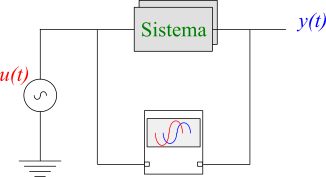

Figura 1: diagrama elétrico para a estimação da resposta em frequência de um sistema.

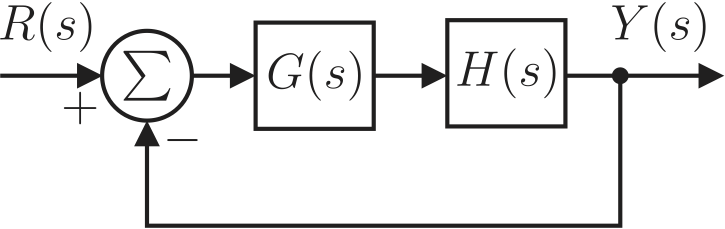

Figura 2: Sistema de controle em malha fechada.

# Resposta A

Frequência, w (rad/s)    Magnitude, 20*log10|H(jw)| (dB)    Fase arg(H(jw)) (˚)
               0.0005                        29.11853085            -0.28811353
                0.001                        29.11820607            -0.57621274
               0.0015                        29.11766482            -0.86428331
                0.002                        29.11690719            -1.15231093
               0.0025                        29.11593329             -1.4402813
                0.003                        29.11474326            -1.72818015
               0.0035                        29.11333729            -2.01599321
                0.004                        29.11171558            -2.30370625
               0.0045                        29.10987838            -2.59130507
                0.005                        29.10782597            -2.87877551
                0.005                        29.10782597            -2.87877551
               0.0055                   

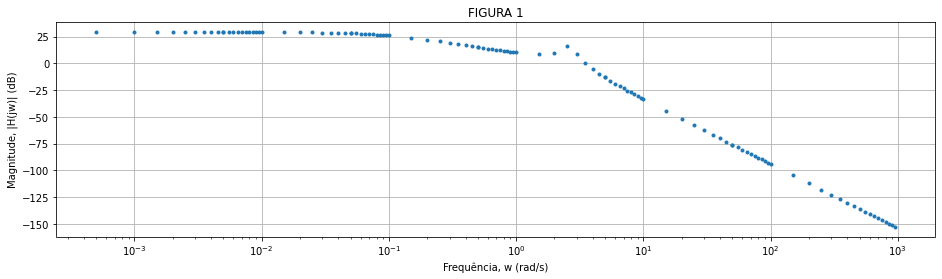

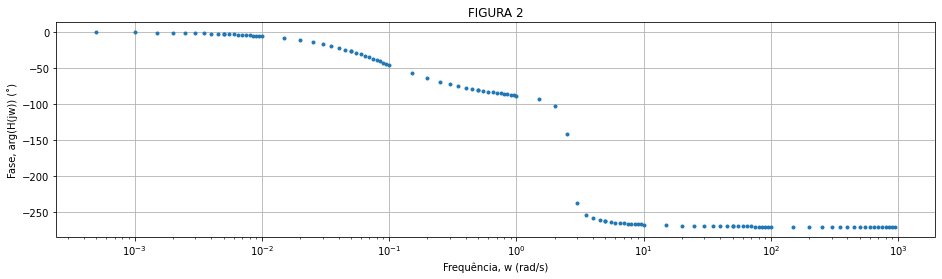


 ------------------------------------------------------------

 Utilizando CURVE_FIT:

CpdB =  [29.10261636]
Cp =  [28.51877179]


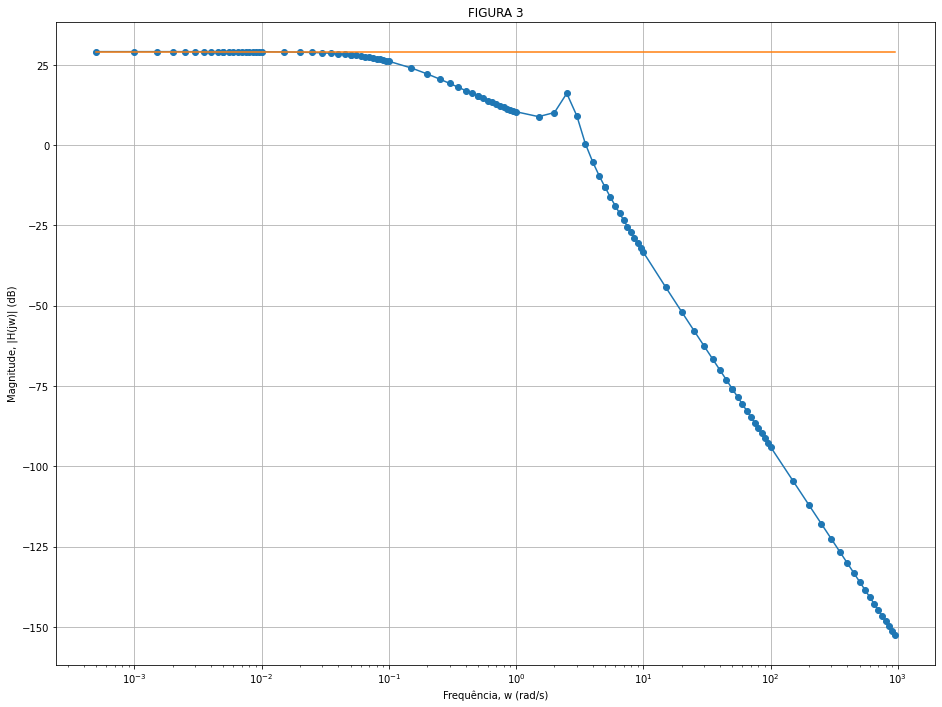

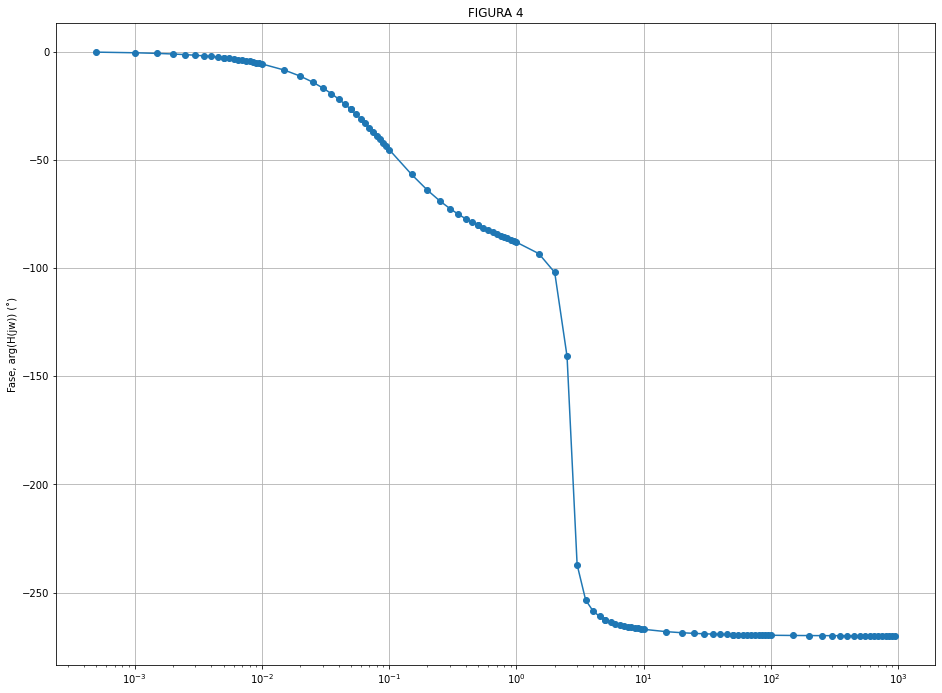

In [ ]:
#Resposta letra A
from numpy import *
from control.matlab import *
import matplotlib.pyplot as plt
from cmath import polar, phase
from math import degrees
from cmath import exp, pi
from scipy.optimize import curve_fit
import numpy as np
import control.matlab as mat
cm = 1/2.54  # centimetros em polegadas

def imprimirRespostaEmFrequencia(omega, arrayabsHjwdB, arrayargHjw):
   print('Frequência, w (rad/s)    Magnitude, 20*log10|H(jw)| (dB)    Fase arg(H(jw)) (˚)')
   for k in range(0,len(omega)):
     print(f'{omega[k]:21}{arrayabsHjwdB[k]:35}{arrayargHjw[k]:23}')

def assintotasBaixasFrequencias(w, kdB):
  return kdB

#Frequência, w (rad/s):  
omega = [5.0e-04, 1.0e-03, 1.5e-03, 2.0e-03, 2.5e-03, 3.0e-03, 3.5e-03,
       4.0e-03, 4.5e-03, 5.0e-03, 5.0e-03, 5.5e-03, 6.0e-03, 6.5e-03,
       7.0e-03, 7.5e-03, 8.0e-03, 8.5e-03, 9.0e-03, 9.5e-03, 1.0e-02,
       1.5e-02, 2.0e-02, 2.5e-02, 3.0e-02, 3.5e-02, 4.0e-02, 4.5e-02,
       5.0e-02, 5.0e-02, 5.5e-02, 6.0e-02, 6.5e-02, 7.0e-02, 7.5e-02,
       8.0e-02, 8.5e-02, 9.0e-02, 9.5e-02, 1.0e-01, 1.5e-01, 2.0e-01,
       2.5e-01, 3.0e-01, 3.5e-01, 4.0e-01, 4.5e-01, 5.0e-01, 5.0e-01,
       5.5e-01, 6.0e-01, 6.5e-01, 7.0e-01, 7.5e-01, 8.0e-01, 8.5e-01,
       9.0e-01, 9.5e-01, 1.0e+00, 1.5e+00, 2.0e+00, 2.5e+00, 3.0e+00,
       3.5e+00, 4.0e+00, 4.5e+00, 5.0e+00, 5.0e+00, 5.5e+00, 6.0e+00,
       6.5e+00, 7.0e+00, 7.5e+00, 8.0e+00, 8.5e+00, 9.0e+00, 9.5e+00,
       1.0e+01, 1.5e+01, 2.0e+01, 2.5e+01, 3.0e+01, 3.5e+01, 4.0e+01,
       4.5e+01, 5.0e+01, 5.0e+01, 5.5e+01, 6.0e+01, 6.5e+01, 7.0e+01,
       7.5e+01, 8.0e+01, 8.5e+01, 9.0e+01, 9.5e+01, 1.0e+02, 1.5e+02,
       2.0e+02, 2.5e+02, 3.0e+02, 3.5e+02, 4.0e+02, 4.5e+02, 5.0e+02,
       5.5e+02, 6.0e+02, 6.5e+02, 7.0e+02, 7.5e+02, 8.0e+02, 8.5e+02,
       9.0e+02, 9.5e+02]

#Magnitude, 20*log10|H(jw)| (dB):  
arrayabsHjwdB = [  29.11853085,   29.11820607,   29.11766482,   29.11690719,
         29.11593329,   29.11474326,   29.11333729,   29.11171558,
         29.10987838,   29.10782597,   29.10782597,   29.10555864,
         29.10307675,   29.10038065,   29.09747076,   29.0943475 ,
         29.09101134,   29.08746277,   29.08370233,   29.07973055,
         29.07554804,   29.02228195,   28.9487964 ,   28.85611642,
         28.7454782 ,   28.6182784 ,   28.47602209,   28.3202726 ,
         28.15260616,   28.15260616,   27.97457322,   27.7876671 ,
         27.59330051,   27.3927891 ,   27.1873415 ,   26.97805473,
         26.76591385,   26.55179487,   26.33646996,   26.12061423,
         24.02744828,   22.17814134,   20.59225766,   19.22972941,
         18.04802991,   17.01261296,   16.09698201,   15.28097991,
         15.28097991,   14.54916176,   13.88955103,   13.29274103,
         12.7512534 ,   12.25907864,   11.81134356,   11.40406787,
         11.03398366,   10.69840028,   10.39510196,    8.87689571,
         10.14838585,   16.11665632,    9.11736301,    0.4341639 ,
         -5.24329772,   -9.56953036,  -13.11927544,  -13.11927544,
        -16.15526057,  -18.82123464,  -21.20544063,  -23.36649213,
        -25.34560665,  -27.17304178,  -28.87176583,  -30.45968707,
        -31.95107744,  -33.35752003,  -44.27383674,  -51.88975882,
        -57.75917622,  -62.53968677,  -66.57431593,  -70.06538067,
        -73.14244056,  -75.89354262,  -75.89354262,  -78.38128371,
        -80.65177527,  -82.73997402,  -84.67301628,  -86.47239161,
        -88.15540951,  -89.73621853,  -91.22653238,  -92.63615874,
        -93.97339176, -104.54220577, -112.03969813, -117.85483955,
       -122.60600798, -126.62299242, -130.10262417, -133.1718543 ,
       -135.91736009, -138.4009629 , -140.66830827, -142.75405932,
       -144.68515991, -146.48296911, -148.16470546, -149.7444525 ,
       -151.2338765 , -152.64274985]
#Fase arg(H(jw)) (˚):  
arrayargHjw = [  -0.28811353,   -0.57621274,   -0.86428331,   -1.15231093,
         -1.4402813 ,   -1.72818015,   -2.01599321,   -2.30370625,
         -2.59130507,   -2.87877551,   -2.87877551,   -3.16610342,
         -3.45327473,   -3.74027539,   -4.02709141,   -4.31370886,
         -4.60011385,   -4.88629258,   -5.1722313 ,   -5.45791632,
         -5.74333405,   -8.57987784,  -11.37541708,  -14.11810183,
        -16.7974781 ,  -19.40465768,  -21.93240098,  -24.37511963,
        -26.72881144,  -26.72881144,  -28.99094345,  -31.16029951,
        -33.236808  ,  -35.22136263,  -37.11564696,  -38.92196968,
        -40.6431157 ,  -42.28221526,  -43.84263198,  -45.32786927,
        -56.80261066,  -64.093492  ,  -69.02441843,  -72.55995747,
        -75.22076934,  -77.30376431,  -78.9880486 ,  -80.38722372,
        -80.38722372,  -81.57653327,  -82.60770845,  -83.5174867 ,
        -84.33271432,  -85.07352081,  -85.7553612 ,  -86.39037025,
        -86.98828517,  -87.55709076,  -88.1034817 ,  -93.3851588 ,
       -102.06901195, -140.83949231, -237.12709103, -253.43200578,
       -258.48730583, -260.99075097, -262.51404542, -262.51404542,
       -263.55293164, -264.31422012, -264.9001632 , -265.3674697 ,
       -265.75031036, -266.07060781, -266.34313357, -266.57824   ,
       -266.78342004, -266.96424463, -268.04148374, -268.54735825,
       -268.84378283, -269.03912903, -269.17775504, -269.2813047 ,
       -269.36162735, -269.42576519, -269.42576519, -269.4781703 ,
       -269.52179678, -269.55868264, -269.59027968, -269.61765034,
       -269.64159013, -269.66270655, -269.68147156, -269.69825746,
       -269.71336181, -269.80896689, -269.85674065, -269.88539825,
       -269.90450114, -269.91814517, -269.92837779, -269.93633628,
       -269.94270295, -269.94791197, -269.95225278, -269.95592574,
       -269.95907398, -269.96180244, -269.96418983, -269.96629634,
       -269.96816879, -269.96984414]

imprimirRespostaEmFrequencia(omega, arrayabsHjwdB, arrayargHjw)
#--------------------------------------------------------------------
#Representar o código acima nas figuras
plt.figure(1, figsize=(40*cm, 10*cm))
plt.semilogx(omega, arrayabsHjwdB,'.') 
plt.title("FIGURA 1")
plt.ylabel('Magnitude, |H(jw)| (dB)')
plt.xlabel('Frequência, w (rad/s)') 
plt.grid(True)
plt.show()

plt.figure(2,figsize=(40*cm, 10*cm))
plt.semilogx(omega,arrayargHjw,'.') 
plt.title("FIGURA 2")
plt.ylabel('Fase, arg(H(jw)) (˚)')
plt.xlabel('Frequência, w (rad/s)')
plt.grid(True) 
plt.show()

#------------------------------------------------------------------------

print('\n ------------------------------------------------------------')
print('\n Utilizando CURVE_FIT:\n')

CpdB, pcov = curve_fit(assintotasBaixasFrequencias, omega[1:21], arrayabsHjwdB[1:21])
Cp = 10**(CpdB/20)      #Para nenhum polo na origem -> TIPO ZERO
print('CpdB = ', CpdB)  #importante esse valor
print('Cp = ', Cp)      #Importante esse valor

plt.figure(3, figsize=(40*cm, 30*cm))
plt.semilogx(omega,arrayabsHjwdB,'-o', omega, CpdB*ones((len(omega), 1)), '-') 
plt.title("FIGURA 3")
plt.ylabel('Magnitude, |H(jw)| (dB)')
plt.xlabel('Frequência, w (rad/s)') 
plt.grid(True)
plt.show()

plt.figure(4,figsize=(40*cm, 30*cm))
plt.semilogx(omega,arrayargHjw,'-o') 
plt.title("FIGURA 4")
plt.ylabel('Fase, arg(H(jw)) (˚)')
plt.grid(True)
plt.show()

# Resposta B 

Utilizando a função curvefit podemos obter um valor interessante que é o de CpdB, vemos na Figura 3 uma assíntota de baixas frequências constante em 29,1026 dB;

Já na magnitude em altas frequências é possível identificar uma assíntota de -60 dB por década;

Para a análise de fase na Figura 4 percebi uma assíntota de baixa frequência nula, que tende a cair para -90 graus com uma taxa de -45 graus por década, esse resultado é devido ao termo de primeira ordem com polo não nulo;

Já a análise de fase em altas frequências, percebi uma queda acentuada de -180 graus, pois próximo da frequência de margem de ganho a fase é -90 graus e termina em aproximadamente -260 graus. Esse comportamento é esperado de um termo de segunda ordem.


# Resposta C

Na análise de magnitude temos uma taxa de -60 dB por década, ou seja, um indicativo de três polos.

Para a análise de zeros temos que o sistema não apresenta subida, ou seja, não há zeros no sistema.

Como a assíntota de baixas frequências não tem variação de ganho e tem uma fase nula, podemos dizer que não há polos ou zeros na origem do sistema. Assim temos o excesso de polos: 3-0 = 3;


# Resposta D 

Como a fase de cruzamento de ganho é menor que −180°, então o sistema é instável. 

A frequência de cruzamento de ganho é quando o ganho cruza o zero, que olhando no gráfico e pela tabela é em torno de $w_c \approx 3.53$ rad/s.  

Assim temos que a margem de fase é $PM = 180° + \phi_c \approx -180° - 254° \approx -74°$;

# Resposta E

Para resolver, vamos fazer como no item anterior, quando olhamos o gráfico e a tabela. 

Vemos que a frequência crítica (quando o ponto na curva de resposta em frequência de fase é igual a −180°) ou seja o $w_{180}$ está em torno de 2.65 rad/s.

 A margem de ganho em dB é dado pelo negativo do ganho no ponto $w_{180}$ que é aproximadamente -17.02dB e o seu valor em magnitude é dado por $K_g = 10^{\frac{-17.02}{20}} \approx 0,1409$;